Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              2098176   
_____________________________________

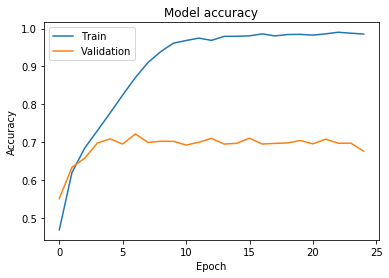

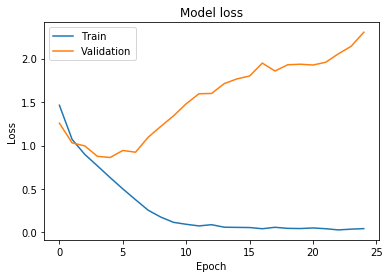

10000/10000 [==============================] - 1s 109us/step
Test accuracy: 0.6608


In [4]:
#Lab Assignment - 5
#DIGITAL IMAGE PROCESSING LAB
#Date – 17/09/2019
#Name – ASHISH GOYAL
#ID Number – 2016UCP1100

#from google.colab import drive        ##use to mount google drive.......
#drive.mount('/content/drive')

import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

def plot_loss_acc(history):             ##function to plot graph for accuracy and loss for both training and validation...
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


# load dataset
(Xtrain, Ytrain), (Xtest, Ytest)=cifar10.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (Xtrain.shape, Ytrain.shape))
print('Test: X=%s, y=%s' % (Xtest.shape, Ytest.shape))

#Normalize the input
Xtrain=Xtrain/255
Xtest=Xtest/255

#Creating the model
cnn_model =Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same')) #applying 32 convolutional filter of size 3x3
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))  #applying Maxpool operation after layer (pool size=2×2)
cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))  #applying 32 convolutional filter of size 3x3
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))  #applying Maxpool operation after layer (pool size=2×2)
cnn_model.add(Flatten())      #convert into 1D feature vector of size(1xn)
cnn_model.add(Dense(1024, activation='relu'))      #convert size from n to 1024
cnn_model.add(Dense(512, activation='relu'))       #convert size from 1024 to 512
cnn_model.add(Dense(10, activation='softmax'))     #convert size from 512 to 10
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model.summary()

#training the model and saving it
model_history = cnn_model.fit(Xtrain, Ytrain, epochs=25, batch_size=128, validation_split=0.2)
cnn_model.save("model.h5")
#drawing accuracy and loss graphs
plot_loss_acc(model_history)

#testing the model
keras.utils.plot_model(cnn_model)
test_loss, test_acc = cnn_model.evaluate(Xtest, Ytest)
print('Test accuracy:', test_acc)